# Визуализация данных

In [ ]:
# 1. matplotlib
# 2. seaborn

In [1]:
# 1. matplotlib
import matplotlib.pyplot as plt

In [2]:
import numpy as np

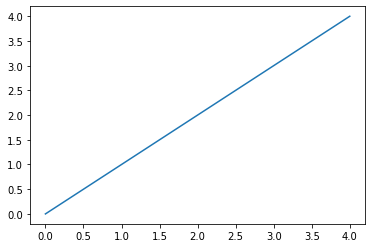

In [3]:
plt.plot(np.arange(5), np.arange(5))

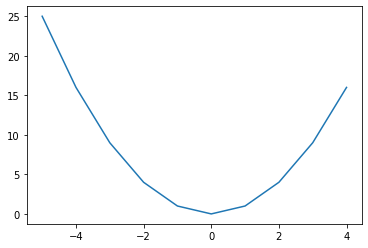

In [4]:
plt.plot(np.arange(-5, 5, 1), np.arange(-5, 5, 1) ** 2)

На семинаре мы будем заниматься построением различных визуализаций. Наша цель - провести **разведочный анализ данных**, чтобы исследовать поведение данных и выявить в них закономерности.

Мы продолжим работать с данными о пассажирах Титаника.

Цели:
* познакомиться с библиотекой seaborn
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

Бонус:
* придумаем свою модель на основе проведенного анализа и сравним с результатом работы метода ближайших соседей

In [67]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['mean']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [ ]:
! command # командная строка

In [2]:
! ls

Applications                           hse_iad5_2021
Blitzstein-introduction-to-probability iad-intro-ds
Desktop                                m1_performance_tests
Documents                              miscellaneous
Downloads                              ncvis
ExaminationRecordSheet_5403984101.xls  ncvis_ref_final
ExaminationRecordSheet_5405941363.xls  nla2020
HPC_course_2021                        psmo_21_22
Innov_manag.pdf                        psmo_book
Library                                psmo_secrets
ML2021_seminars                        scikit_learn_data
Movies                                 sem04_visualization.ipynb
Music                                  sem04_visualization_SOLUTION.ipynb
Pictures                               sem04_visualization_solved.ipynb
Public                                 siamese_reidentification
TSR_01.pdf                             sl1.png
bayesian                               vosk-api
cpp_learn                              ~$flective Report.

Загрузим данные.

In [68]:
Data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
                   sep=";")

**Задание 1.** Выведите на экран размеры таблицы

In [69]:
#your code here
Data.shape

(891, 12)

In [70]:
Data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


# Обработка признаков и однофакторный анализ

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

**Задание 2.** Выведите основные числовые характеристики числовых столбцов.

In [71]:
Data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [72]:
#your code here
Data.describe().loc['mean', :]

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
Name: mean, dtype: float64

In [73]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


Функция не позволяет увидеть наличие пропусков в нечисловых столбцах.

**Обработаем признак 'Sex'**

**Задание 3.** Проверьте, есть ли пропуски в столбце.

In [74]:
#your code here
Data.Sex.value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

In [75]:
Data[Data.Sex == "unknown"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,Moran; Mr. James,unknown,NaN,0,0,330877,8.4583,NaN,Q
13,14,0,3,Andersson; Mr. Anders Johan,unknown,39.00,1,5,347082,31.2750,NaN,S
28,29,1,3,"O'Dwyer; Miss. Ellen ""Nellie""",unknown,NaN,0,0,330959,7.8792,NaN,Q
49,50,0,3,Arnold-Franchi; Mrs. Josef (Josefine Franchi),unknown,18.00,1,0,349237,17.8000,NaN,S
78,79,1,2,Caldwell; Master. Alden Gates,unknown,0.83,0,2,248738,29.0000,NaN,S


**Задание 4.** Удалите пассажиров неизвестного пола, так как их всего 5.

In [76]:
#your code here
Data = Data[Data.Sex != "unknown"]

In [11]:
Data.filter()

TypeError: Must pass either `items`, `like`, or `regex`

In [77]:
Data.shape

(886, 12)

**Задание ***. Подумайте, можно ли как-то узнать пол пассажиров, которые отнесены к категории unknown?

In [13]:
#your code here

Признак 'Sex' является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа. Как это можно сделать? 

**Задание 5.** Придумайте кодировку и сделайте её.

In [78]:
Data.Sex.value_counts()

male      574
female    312
Name: Sex, dtype: int64

In [79]:
Data.Sex = Data.Sex.apply(lambda x: 1 if x == 'female' else 0)

In [80]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,0,35.0,0,0,373450,8.0500,NaN,S


In [81]:
Data.Sex.value_counts()

0    574
1    312
Name: Sex, dtype: int64

In [18]:
#your code here
sex_dummy = np.zeros_like(Data.Sex)
sex_dummy[Data.Sex == "female"] = 1

Data.Sex = sex_dummy.copy()

Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,0,35.0,0,0,373450,8.0500,NaN,S


---

In [82]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,0,35.0,0,0,373450,8.0500,NaN,S


Посмотрим, как влияет пол на выживаемость.

Text(0.5, 1.0, 'Sex - Survived')

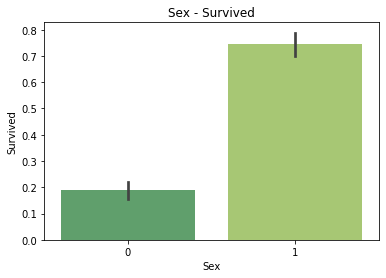

In [83]:
sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')
plt.title('Sex - Survived')
#plt.show()

Text(0.5, 0, 'Sex')

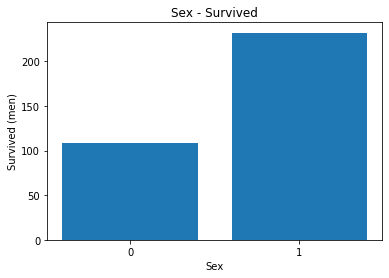

In [84]:
plt.bar([0, 1], [Data.Survived[Data.Sex == 0].sum(), Data.Survived[Data.Sex == 1].sum()])
plt.xticks([0, 1])
plt.title("Sex - Survived")
plt.ylabel("Survived (men)")
plt.xlabel("Sex")

Посмотрим, как влияет пол человека и класс билета (Pclass) на выживаемость

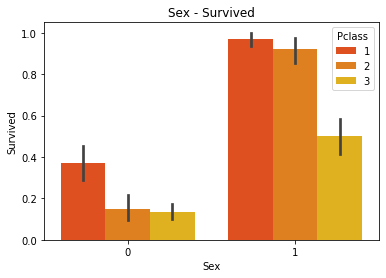

In [85]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='autumn')
plt.title('Sex - Survived')
plt.show()

Ещё один полезный вид визуализации - ящик с усами. Посмотрим на ящик с усами, отражающий распределение пассажиров по полу и возрасту.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


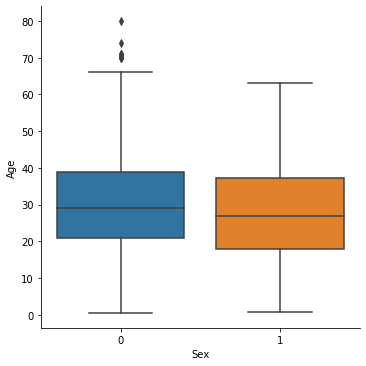

In [86]:
sns.factorplot(x="Sex", y="Age", data=Data, kind="box") # box plot (box-and-whiskers-plot)
plt.show()

Можно детализировать картинку, добавив разделение по Pclass.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


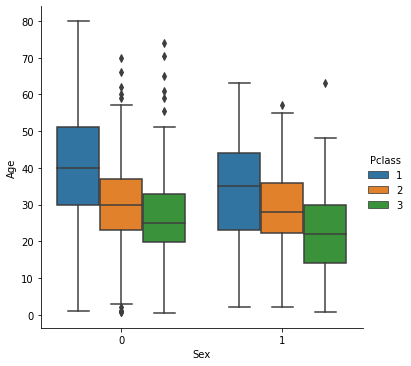

In [87]:
sns.factorplot(x="Sex", y="Age",hue ="Pclass", data=Data, kind="box")
plt.show()

**Обработаем признак 'Embarked'**

In [88]:
print(Data['Embarked'].value_counts(dropna=False))
Data.shape

S      641
C      168
Q       75
NaN      2
Name: Embarked, dtype: int64


(886, 12)

**Задание 6.** Удалим из таблицы пассажиров, для которых неизвестен порт посадки (Embarked).

In [89]:
Data.dropna(subset=['Embarked'], inplace=True)
Data.shape

(884, 12)

**Задание 7.** Закодируем столбец Embarked с помощью OneHot-кодирования (pd.get_dummies). 

In [90]:
Data = pd.get_dummies(Data, columns=['Embarked'], drop_first=True)
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,Braund; Mr. Owen Harris,0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,1,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,Heikkinen; Miss. Laina,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),1,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,Allen; Mr. William Henry,0,35.0,0,0,373450,8.0500,NaN,0,1


**Обработаем признак 'Age'**

Проверьте, если ли в Age пропущенные значения.

In [91]:
#your code here
Data.Age.isna().value_counts()

False    709
True     175
Name: Age, dtype: int64

In [92]:
175 / (709 + 175)

0.19796380090497737

In [93]:
(709 + 175) / 2

442.0

In [94]:
1, 1, 1, 1, 100

med = 1
mean = 104 / 5

Заполним пропуски медианным значением Age.

In [95]:
median_age = Data['Age'].median()

Data['Age'].fillna(median_age, inplace=True)

Нарисуем распределение возраста пассажиров.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


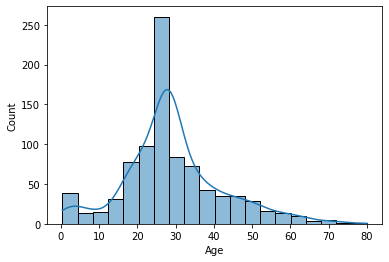

In [96]:
sns.histplot(Data['Age'], kde=True, bins = 20)
plt.show()

Посмотрим на распределение Pclass по возрастам.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing 

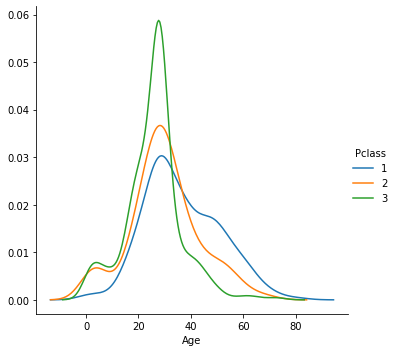

In [97]:
import seaborn as sns

facet = sns.FacetGrid(data = Data, hue = "Pclass", legend_out=True, size = 5)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();

**Обработаем признак 'Fare'**

1) Проверьте, если ли в Fare пропущенные значения

2) Если пропущенные значения есть, заполните их медианным значением Fare

In [98]:
#your code here
Data.Fare.isna().value_counts()

False    884
Name: Fare, dtype: int64

**Обработаем признак 'Pclass'**

Есть ли в Pclass пропущенные значения?

In [99]:
Data['Pclass'].isna().value_counts()

False    884
Name: Pclass, dtype: int64

**Задание 8.** Нарисуйте гистограмму выживаемости в зависимости от Pclass.

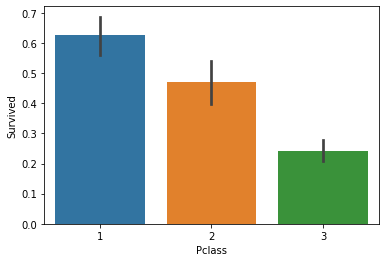

In [100]:
#your code here
sns.barplot(x = "Pclass", y = 'Survived', data = Data)

**Обработаем признак 'SibSp' (число братьев или сестер, мужей, жен)**

Есть ли в SibSp пропущенные значения?

In [101]:
Data['SibSp'].isna().value_counts()

False    884
Name: SibSp, dtype: int64

**Обработаем признак 'Parch' (число родителей/детей)**

Есть ли в Parch пропущенные значения?

In [102]:
Data['Parch'].isna().value_counts()

False    884
Name: Parch, dtype: int64

**Задание 9.** Столбец PassengerId является категориальным и не несёт важной информации, удалите его.

In [103]:
#your code here
Data.drop('PassengerId', axis = 1, inplace = True)

In [104]:
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,0,3,Braund; Mr. Owen Harris,0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,1,38.0,1,0,PC 17599,71.2833,C85,0,0
2,1,3,Heikkinen; Miss. Laina,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),1,35.0,1,0,113803,53.1000,C123,0,1
4,0,3,Allen; Mr. William Henry,0,35.0,0,0,373450,8.0500,NaN,0,1


# Исследование признаков и feature engineering

Нарисуем матрицу корреляций числовых признаков между собой и с целевой переменной. 

**Задание 10.** Создайте таблицу NumericData, которая содержит только числовые столбцы из таблицы Data.

In [105]:
Data.dtypes

Survived        int64
Pclass          int64
Name           object
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Ticket         object
Fare          float64
Cabin          object
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [106]:
Data.Sex = Data.Sex.astype(int)

In [107]:
#your code here
NumericData = Data._get_numeric_data()
NumericData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1


In [108]:
NumericData.corr() # Корреляции Пирсона

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
Survived,1.000000,-0.335506,0.543777,-0.067165,-0.032450,0.087297,0.256200,0.002703,-0.151664
Pclass,-0.335506,1.000000,-0.129810,-0.338843,0.081720,0.013969,-0.548094,0.217939,0.079008
Sex,0.543777,-0.129810,1.000000,-0.086858,0.116404,0.261302,0.181285,0.074009,-0.120986
Age,-0.067165,-0.338843,-0.086858,1.000000,-0.234719,-0.176253,0.093524,-0.030963,-0.007783
SibSp,-0.032450,0.081720,0.116404,-0.234719,1.000000,0.421809,0.160630,-0.023379,0.067719
Parch,0.087297,0.013969,0.261302,-0.176253,0.421809,1.000000,0.221926,-0.078248,0.056153
Fare,0.256200,-0.548094,0.181285,0.093524,0.160630,0.221926,1.000000,-0.114707,-0.165913
Embarked_Q,0.002703,0.217939,0.074009,-0.030963,-0.023379,-0.078248,-0.114707,1.000000,-0.494518
Embarked_S,-0.151664,0.079008,-0.120986,-0.007783,0.067719,0.056153,-0.165913,-0.494518,1.000000


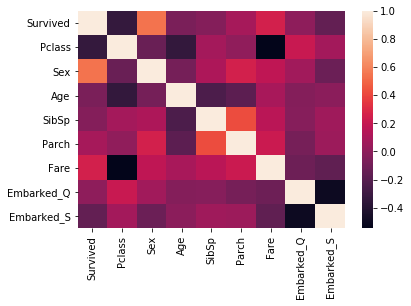

In [109]:
sns.heatmap(NumericData.corr())

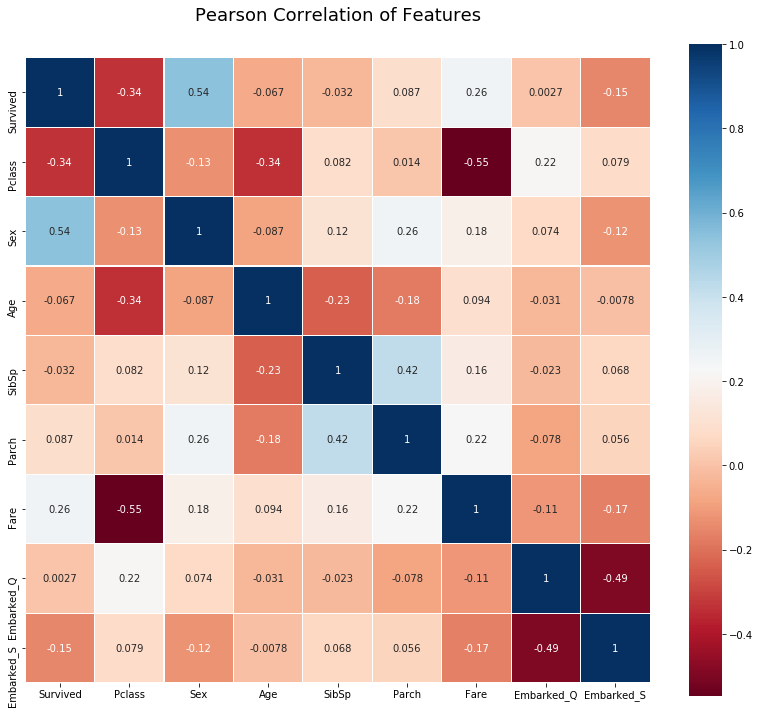

In [110]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Посмотрим на попарные зависимости некоторых признаков.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


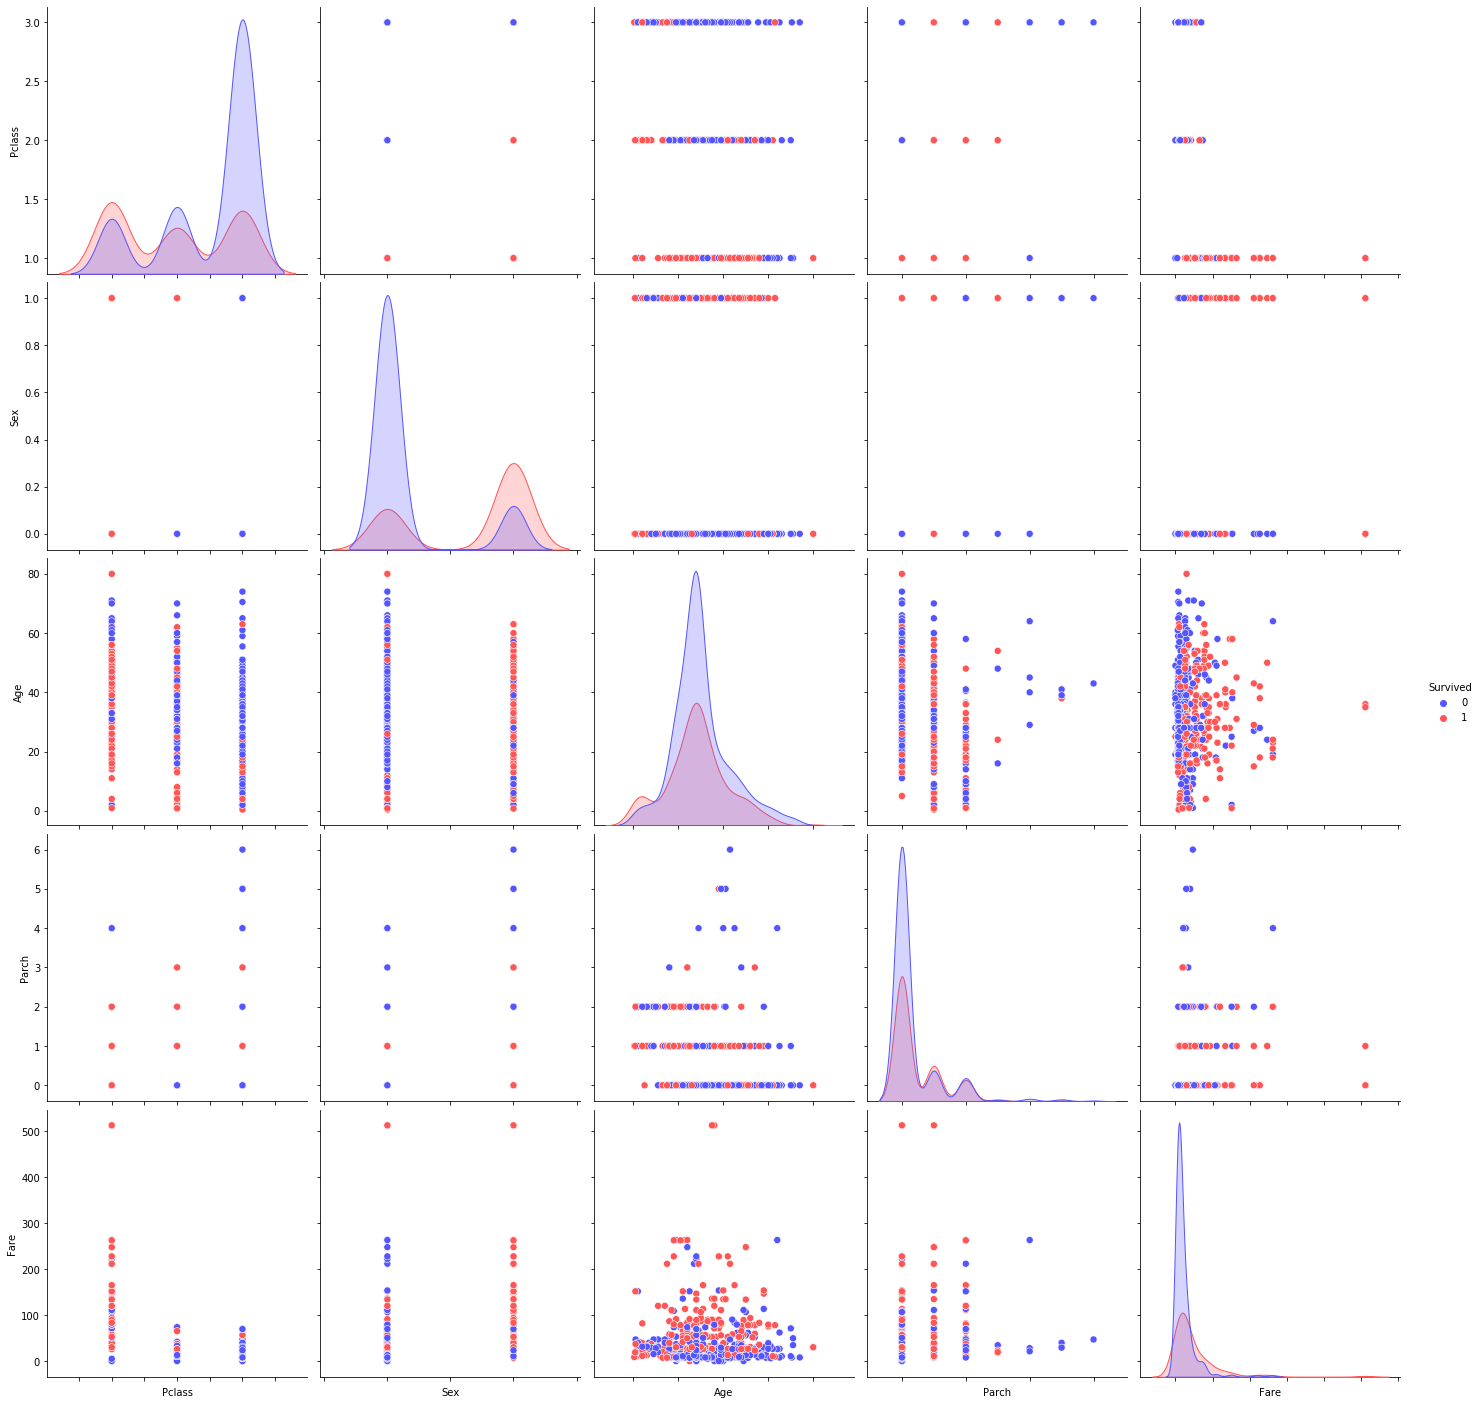

In [111]:
g = sns.pairplot(Data[['Survived', u'Pclass', 'Sex', 'Age', 'Parch', 'Fare']], \
                 hue='Survived', palette = 'seismic', size=4, diag_kind = 'kde', \
                 diag_kws=dict(shade=True), plot_kws=dict(s=50) )
g.set(xticklabels=[])

Зачастую признак может быть зашумлен или может содержать лишнюю (слишком детализированную, ведущую к переобучению) информацию. Возможным решением этой проблемы служит бинаризация признака.

Бинаризуем признаки Age и Fare

* pd.cut - разбиение целочисленных данных на несколько интервалов по квантилям
* pd.qcut - разбиение числовых (не обязательно целочисленных) данных на несколько интервалов по квантилям

In [112]:
pd.cut(Data['Age'].astype(int), 5)

0      (16.0, 32.0]
1      (32.0, 48.0]
2      (16.0, 32.0]
3      (32.0, 48.0]
4      (32.0, 48.0]
           ...     
886    (16.0, 32.0]
887    (16.0, 32.0]
888    (16.0, 32.0]
889    (16.0, 32.0]
890    (16.0, 32.0]
Name: Age, Length: 884, dtype: category
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

In [113]:
Data['AgeBin'] = pd.cut(Data['Age'].astype(int), 5)

Data['AgeBin'].head()

0    (16.0, 32.0]
1    (32.0, 48.0]
2    (16.0, 32.0]
3    (32.0, 48.0]
4    (32.0, 48.0]
Name: AgeBin, dtype: category
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

Теперь переведём полученные интервалы в числа, используя LabelEncoder.

In [114]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

Data['AgeBin_Code'] = label.fit_transform(Data['AgeBin'])

Data[['Age','AgeBin','AgeBin_Code']].head()

,Age,AgeBin,AgeBin_Code
0,22.0,"(16.0, 32.0]",1
1,38.0,"(32.0, 48.0]",2
2,26.0,"(16.0, 32.0]",1
3,35.0,"(32.0, 48.0]",2
4,35.0,"(32.0, 48.0]",2


**Задание 11.** Бинаризуйте Fare, используя разбиение на 4 интервала.

In [115]:
#your code here
fare_bin = pd.cut(Data.Fare, bins = 4)

label_encoder2 = LabelEncoder()
Data['FareBin_Coded'] = label_encoder2.fit_transform(fare_bin)

In [116]:
fare_bin

0      (-0.512, 128.082]
1      (-0.512, 128.082]
2      (-0.512, 128.082]
3      (-0.512, 128.082]
4      (-0.512, 128.082]
             ...        
886    (-0.512, 128.082]
887    (-0.512, 128.082]
888    (-0.512, 128.082]
889    (-0.512, 128.082]
890    (-0.512, 128.082]
Name: Fare, Length: 884, dtype: category
Categories (4, interval[float64]): [(-0.512, 128.082] < (128.082, 256.165] < (256.165, 384.247] < (384.247, 512.329]]

In [117]:
Data.FareBin_Coded.value_counts()

0    846
1     29
2      6
3      3
Name: FareBin_Coded, dtype: int64

In [118]:
Data[['Fare', 'FareBin_Coded']]

,Fare,FareBin_Coded
0,7.2500,0
1,71.2833,0
2,7.9250,0
3,53.1000,0
4,8.0500,0
...,...,...
886,13.0000,0
887,30.0000,0
888,23.4500,0
889,30.0000,0


Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки Parch и SibSp слабо коррелируют с выживаемостью (Survived). Сконструируем новые признаки, чтобы решить эти вопросы.

**Задание 12.**

1) Создайте признак 'NameLen' и запишите в него длину имени (Name).

2) Создайте признак 'FamilySize', равный Parch + SibSp + 1. Зачем добавлять 1?

3) Создайте признак 'IsAlone', который показывает, путешествовал человек один или с семьей.

In [119]:
# 1
Data['NameLen'] = Data.Name.apply(len)

In [120]:
# 2
Data['FamilySize'] = Data.Parch + Data.SibSp + 1

In [121]:
# 3
Data['IsAlone'] = (Data.FamilySize == 1).astype(int)

#place = np.zeros_like(orig) # orig: bool
#place[orig] = 'T'
#place[~orig] = 'F'

**Задание 13.** Посмотрите, как коррелируют новые признаки (не забудьте про бинаризованные признаки) со столбцом 'Survived'.

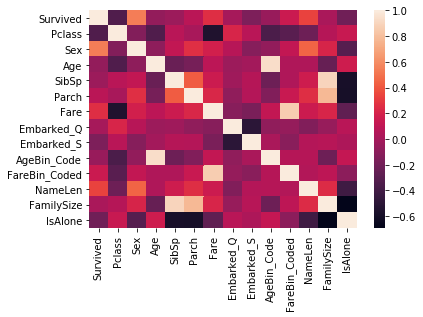

In [122]:
#your code here
sns.heatmap(Data.corr())

# Пирсон: только между непрерывными!!!!
# непр - непр
# непр - бин
# бин - бин

# Категориальные:
# критерий согласия хи-квадрат
# тау кемпбелла
# ...

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков. 

**Задание 14*.** Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью.

In [123]:
# Добавим, например, квадрат возраста
# Возможное объяснение: дети и пожилые люди в среднем менее выносливы, чем люди среднего возраста,
# а потому вероятность спасения последних выше
# NB: не факт, что пояснение "правильно" (скорее всего, оно неправильно):
# помогает ли данная переменная в предсказаниях или нет мы определим 
# дальше, анализируя корреляции и изучая результаты работы моделей
# Главное – что это возможная логично поставленная гипотеза
Data['AgeSq'] = Data['Age'] ** 2

**Задание 15.** Верно ли, что если признак имеет маленькую по модулю корреляцию с выживаемостью, то это означает, что он не влияет на выживаемость и бесполезен для нашей задачи?

In [ ]:
# 1. Нет, потому что категориальные переменные, а корреляция Пирсона только для непрерывных
# 2. Нет, потому что зависимость мб нелинейной, но корреляция это не поймает

In [ ]:
np.array()

# Бонус.

**Задание 16*.** Мы провели довольно подробный однофакторный анализ данных и увидели, какие признаки сильно влияют на выживаемость, а какие нет. 

a) Попробуйте написать свою модель для предсказания выживаемости, используя обнаруженные закономерности. 

b) Оцените качество модели - вычислите долю правильных ответов алгоритма по всем данным.

In [139]:
def prediction(x):
    # x - один объект
    if x['Sex'] == 1:
        return 1
    else:
        return 0

In [140]:
from sklearn.metrics import accuracy_score

pred = Data.apply(lambda x: prediction(x), axis=1)

accuracy_score(Data['Survived'], pred) # WOW!

0.7873303167420814

**Задание 17.***

Разобъем данные на тренировочную и тестовую часть с помощью train_test_split.

2) Обучите KNN на тренировочной части, сделайте предсказание на тесте и вычислите долю правильных ответов.

3) С помощью написанной вами раннее модели сделайте предсказание на тесте и оцените его качество.

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

y = Data['Survived']
X = Data._get_numeric_data().drop('Survived', axis=1)

np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [152]:
# 2)
knn = KNeighborsClassifier(n_neighbors = 3) # Нужно пробовать разное количество соседей
knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test)) # По договорённости в метриках первый агрумент = истинная выборка

0.6742081447963801

In [153]:
# 3)
accuracy_score(y_test, X_test.apply(lambda x: prediction(x), axis=1)) # Amazing!

0.7873303167420814

In [154]:
# 4) Для интереса -- случайное предсказание (монетка с вер. орла = 1/2)
random_pred = np.random.binomial(1, 1/2, len(y_test))
accuracy_score(y_test, random_pred)

0.4751131221719457